In [2]:
import pandas as pd
import numpy as np

from scipy.stats import pearsonr
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# from statsmodels.tsa.holtwinters import SimpleExpSmoothing

import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.simplefilter('ignore')

In [3]:
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 100)

#### read csv files from kaggle 

In [4]:
df_gemini_price_d = pd.read_csv('datasets/kaggle/BTCUSD_day.csv')
df_gemini_price_1h = pd.read_csv('datasets/kaggle/BTCUSD_1hr.csv')

#### convert columns to datetime

In [5]:
df_gemini_price_d['Date'] = pd.to_datetime(df_gemini_price_d['Date'])
df_gemini_price_1h['Date'] = pd.to_datetime(df_gemini_price_1h['Date'])

#### verify the range of datetime in dataframes

In [6]:
print('------------', 'df_gemini_price_d', '------------')
print(df_gemini_price_d['Date'].max())
print(df_gemini_price_d['Date'].min())
print('------------', 'df_gemini_price_1h', '------------')
print(df_gemini_price_1h['Date'].max())
print(df_gemini_price_1h['Date'].min())

------------ df_gemini_price_d ------------
2020-04-09 00:00:00
2015-10-08 00:00:00
------------ df_gemini_price_1h ------------
2020-04-09 00:00:00
2015-10-08 13:00:00


#### verify the numbers of lines in dataframes

In [7]:
print('------------', 'df_coinmarket_price_d', '------------')
print(df_gemini_price_d.shape[0])
print('------------', 'df_coinmarket_price_1h', '------------')
print(df_gemini_price_1h.shape[0])

------------ df_coinmarket_price_d ------------
1646
------------ df_coinmarket_price_1h ------------
39468


In [25]:
class NaiveForecast(object):
    
    def __init__(self, df, percentage_train_size, periodicity):
        
        self.df = df
        self.percentage_train_size = percentage_train_size
        self.periodicity = periodicity
                
    def perform(self):
        
        train_size = int(len(self.df) * self.percentage_train_size)
        self.df[:train_size]
        
        array_pred = np.array([])
        
        date_test = self.df[train_size:].index
        count = 0
        
        for current_datetime in date_test:

            pred = self.prediction(current_datetime = current_datetime)
            array_pred = np.append(array_pred, pred)
            print('---')
            print('current_datetime', current_datetime)
            print('pred', pred)
#             count += 1
#             print(count/len(date_test)*100)
        
        date_train = self.df[1:train_size].index
        y_train = self.df[1:train_size]['Close'].values
        y_train_predict = self.df[:train_size]['Close'].shift(1).values[1:]
        
        y_test = self.df[train_size:]['Close'].values
        
        data_train = {
          'date_train': date_train,
          'y_train': y_train,
          'y_train_predict': y_train_predict
        }

        data_test = {
            'date_test': date_test,
            'y_test': y_test,
            'y_test_predict': array_pred
        }

        df_train = pd.DataFrame(data_train)
        df_test = pd.DataFrame(data_test)

        mae, mape, mse, rmse, rmspe, r2, pearson = self.perform_metrics(df_test['y_test'],
                                                                        df_test['y_test_predict'])
        print('mae', mae,
              'mape', mape,
              'mse', mse,
              'rmse', rmse,
              'rmspe', rmspe,
              'r2', r2,
              'pearson', pearson)

        
        return df_train, df_test
       
    def prediction(self, current_datetime):
        
        if self.periodicity == '1_day':
            last_datetime = (current_datetime - pd.Timedelta(days = 1))
            
        if self.periodicity == '1_hour':
            last_datetime = (current_datetime - pd.Timedelta(hours = 1))
            
        pred = self.df[last_datetime:last_datetime]['Close'].values[0]
        
        return pred
        
    def perform_metrics(self, y_truth, y_forecasted): 

        mae = round(mean_absolute_error(y_truth, y_forecasted) ,4)
        mape = round(np.mean(np.abs((y_truth - y_forecasted) / y_truth)) * 100, 4)
        mse = round(mean_squared_error(y_truth, y_forecasted), 4)
        rmse = round(mse**(0.5), 4)
        rmspe = round((np.sqrt(np.mean(np.square((y_truth - y_forecasted) / y_truth)))) * 100, 4)
        r2 = round(r2_score(y_truth, y_forecasted), 4)
        try:
            corr, _ = pearsonr(y_truth, y_forecasted)
            pearson = round(corr, 4)
        except:
            pearson = None

        return mae, mape, mse, rmse, rmspe, r2, pearson
    

In [28]:
### MAIN

# df = df_gemini_price_d.copy()
df = df_gemini_price_1h.copy()

df = df.set_index('Date')
df = df.sort_values(by = ['Date'])
df = df.loc[:, ['Close']]

df = df.asfreq('H') # D or H

naive_forecast = NaiveForecast(df = df,
                               percentage_train_size = 0.80,
                               periodicity = '1_hour')
df_train, df_test = naive_forecast.perform()

---
current_datetime 2019-05-16 03:00:00
pred 8320.01
---
current_datetime 2019-05-16 04:00:00
pred 8247.34
---
current_datetime 2019-05-16 05:00:00
pred 7983.68
---
current_datetime 2019-05-16 06:00:00
pred 7994.15
---
current_datetime 2019-05-16 07:00:00
pred 8126.34
---
current_datetime 2019-05-16 08:00:00
pred 8010.72
---
current_datetime 2019-05-16 09:00:00
pred 7977.07
---
current_datetime 2019-05-16 10:00:00
pred 7960.58
---
current_datetime 2019-05-16 11:00:00
pred 7862.73
---
current_datetime 2019-05-16 12:00:00
pred 7870.69
---
current_datetime 2019-05-16 13:00:00
pred 7799.72
---
current_datetime 2019-05-16 14:00:00
pred 7859.99
---
current_datetime 2019-05-16 15:00:00
pred 7953.24
---
current_datetime 2019-05-16 16:00:00
pred 8024.22
---
current_datetime 2019-05-16 17:00:00
pred 7921.76
---
current_datetime 2019-05-16 18:00:00
pred 7919.76
---
current_datetime 2019-05-16 19:00:00
pred 7907.78
---
current_datetime 2019-05-16 20:00:00
pred 7838.36
---
current_datetime 2019-05

In [14]:
# NAIVE 1d
# mae 257.2772 mape 2.9779 mse 160702.2419 rmse 400.8768 rmspe 5.3266 r2 0.9299 pearson 0.9649

In [15]:
# NAIVE 1h
# mae 43.9948 mape 0.5058 mse 6889.2637 rmse 83.0016 rmspe 1.0085 r2 0.997 pearson 0.9985

In [29]:
# df_train.head()
# df_test.head()

# df_train.to_csv('train_naive_1d.csv', sep = "\t", index = False)
# df_test.to_csv('test_naive_1d.csv', sep = "\t", index = False)
# pd.read_csv('train_naive_1d.csv', sep = "\t")
# pd.read_csv('test_naive_1d.csv', sep = "\t")

df_train.to_csv('train_naive_1h.csv', sep = "\t", index = False)
# df_test.to_csv('test_naive_1h.csv', sep = "\t", index = False)
# pd.read_csv('train_naive_1h.csv', sep = "\t")
# pd.read_csv('test_naive_1h.csv', sep = "\t")

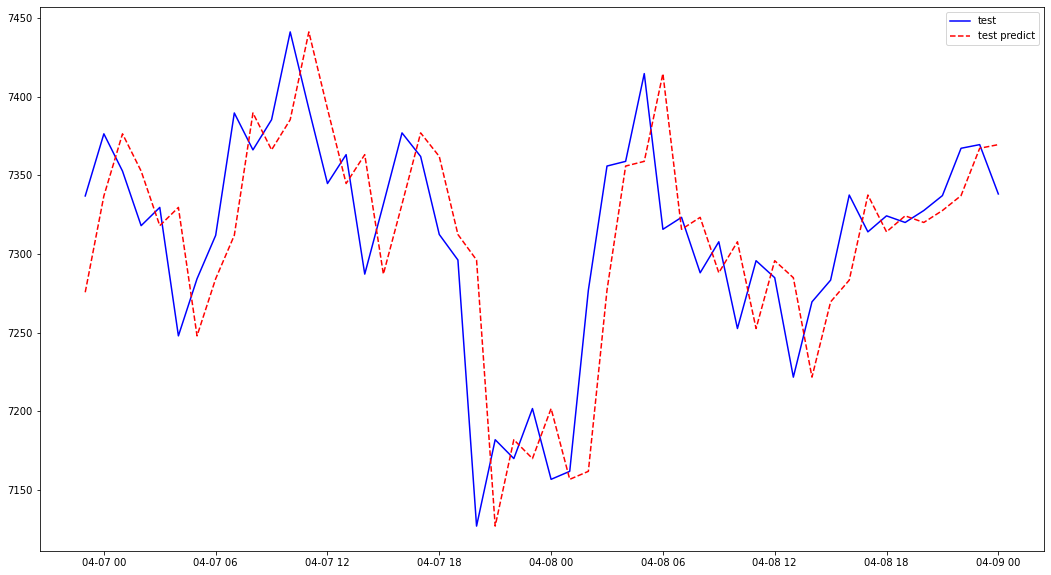

In [25]:
fig, ax = plt.subplots(figsize=(18, 10))

# ax.plot(df_train['date_train'], df_train['y_train'], label = 'train', color="blue")
# ax.plot(df_train['date_train'], df_train['y_train_predict'], '--', label = 'train predict', color="red")

ax.plot(df_test['date_test'][-50:], df_test['y_test'][-50:], label = 'test', color="blue")
ax.plot(df_test['date_test'][-50:], df_test['y_test_predict'][-50:], '--', label = 'test predict', color="red")

ax.legend()
plt.show()